In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# global-net-clean.dat is the global-net.dat file with instances of \r\n replaced with just \n
graph = nx.read_edgelist("data/global-net-clean.dat", delimiter=" ")
#print(graph.nodes())
#print(graph.edges())

# conveniently, they are in id order already in the file
cities = []
with open("data/global-cities.dat", "r") as file:
    for line in file:
        parts = line.strip().split("|") 
        cities.append(parts[2])

#print(cities)

['1', '1198', '2482', '1054', '1970', '67', '92', '195', '370', '917', '1191', '1228', '1302', '1533', '1680', '2021', '2164', '2196', '2302', '2084', '2593', '2626', '2628', '2694', '3052', '3080', '3159', '3189', '3391', '3512', '144', '289', '362', '433', '546', '614', '785', '1038', '1175', '1184', '1329', '1450', '1528', '1625', '1908', '2127', '2160', '2178', '2198', '2199', '2208', '2378', '2450', '2672', '2761', '2806', '2962', '3002', '3126', '3136', '3168', '3323', '3360', '3380', '3388', '3407', '3859', '179', '548', '732', '981', '1099', '1166', '1192', '1205', '1328', '1383', '1414', '1513', '1563', '1736', '1771', '1820', '1856', '1902', '1966', '2003', '2074', '2229', '2236', '2250', '2371', '2400', '2478', '2749', '2759', '2773', '2812', '2886', '2916', '3591', '3740', '3758', '3782', '3788', '2734', '19', '65', '119', '122', '197', '277', '325', '326', '359', '375', '380', '453', '487', '584', '585', '592', '600', '624', '646', '664', '666', '674', '729', '735', '799',

In [ ]:
components = list(nx.connected_components(graph))
for c in enumerate(components):
    print(f"Found component: {c}")

Found component: (0, {'1229', '3145', '741', '3535', '2343', '296', '2057', '2100', '3872', '3028', '1832', '514', '2946', '1680', '3056', '3185', '1064', '1059', '2976', '297', '2387', '1607', '539', '640', '1300', '192', '1218', '846', '1716', '3685', '3323', '2766', '2652', '2368', '1219', '655', '1399', '2037', '3563', '23', '596', '1185', '3176', '3375', '1279', '313', '2425', '1547', '3369', '2417', '2508', '256', '1719', '3415', '976', '2117', '3168', '438', '590', '3057', '1745', '2543', '1196', '1309', '1846', '1695', '1397', '693', '1624', '70', '284', '2523', '1048', '2780', '947', '437', '3207', '2', '3871', '3194', '3121', '789', '251', '1061', '1751', '569', '3332', '2987', '3348', '1195', '2728', '1341', '1263', '3008', '2031', '1610', '2935', '1296', '2486', '1970', '1856', '2937', '118', '2145', '3628', '1076', '837', '1005', '2038', '2164', '912', '797', '1535', '2310', '1953', '3156', '466', '606', '3506', '2941', '2294', '56', '3571', '2977', '1379', '2654', '2266',

In [27]:
largest_component = max(components, key=len)
largest_component_graph = graph.subgraph(largest_component).copy()
numedges = list(largest_component_graph.edges())


print(f"largest component has {len(largest_component_graph)} nodes and {len(numedges)} edges")


largest component has 3618 nodes and 14142 edges


In [ ]:
nodes_sorted = sorted(largest_component_graph.degree(), key=lambda x: x[1], reverse=True)

print("top 10 nodes by degree:")
for node, degree in nodes_sorted[:10]:
    print(f"City: {cities[node-1]}, Degree: {degree}")

top 10 nodes by degree:
Node ID: 2343, Degree: 250
Node ID: 1775, Degree: 242
Node ID: 962, Degree: 237
Node ID: 119, Degree: 192
Node ID: 2020, Degree: 186
Node ID: 548, Degree: 184
Node ID: 2229, Degree: 179
Node ID: 179, Degree: 172
Node ID: 732, Degree: 147
Node ID: 1205, Degree: 144


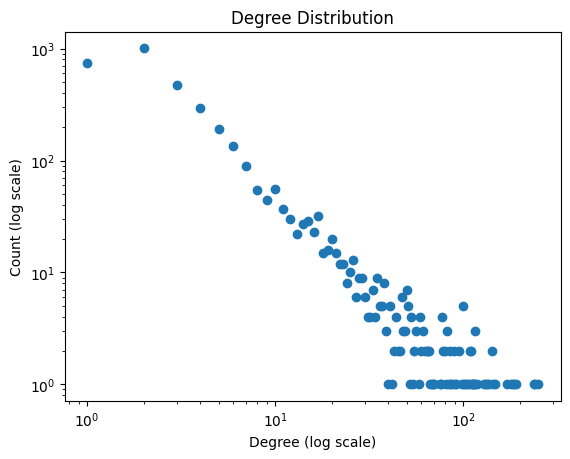

In [ ]:
degrees = [d for _, d in largest_component_graph.degree()]
degrees_count = {k: degrees.count(k) for k in set(degrees)}

x, y = zip(*degrees_count.items())

plt.scatter(x, y)

plt.xscale("log"); plt.yscale("log")

plt.xlabel("Degree (log scale)")
plt.ylabel("Count (log scale)")
plt.title("Degree Distribution")

plt.show()

In [42]:
diameter = nx.diameter(graph)
print(f"diameter is: {diameter}")

diameter is: 17


In [12]:
shortest_path = nx.shortest_path(graph, source="501", target="635")
print(f"shortest path from canberra to cape town is:")
for city in shortest_path:
    print(cities[int(city)-1])


shortest path from canberra to cape town is:
Canberra
Melbourne (AU)
Mauritius
Cape Town


In [ ]:
betweenness = nx.betweenness_centrality(graph)

sorted_btwn = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
print("top 10 nodes by betweenness:")
for node, value in sorted_btwn:
    print(f"{cities[node-1]}: {value:.3f}")

top 10 nodes by betweenness:


TypeError: unsupported operand type(s) for -: 'str' and 'int'